In [ ]:
# 2014-04-22

In [1]:
import os
from PIL import Image
from functools import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
files = np.concatenate([map(lambda p: root + '/' + p, files) for root, subfolders, files in os.walk("data/pca") if root != 'data/pca'])

In [3]:
originalsize = np.array([92, 112])
imgsize = originalsize / 3

In [4]:
images = map(lambda im: np.array(im.convert('L').resize(imgsize)), map(Image.open, files))

In [5]:
flat = np.array(map(lambda im: im.flatten(), images))

In [6]:
med = np.mean(flat, axis=0)

In [7]:
cov_matr = np.cov(flat.T) # saved

In [8]:
eivl, eivc = np.linalg.eig(cov_matr)

In [9]:
inveivc = np.conjugate(eivc.T)

/home/zach/notebooks/.env/local/lib/python2.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


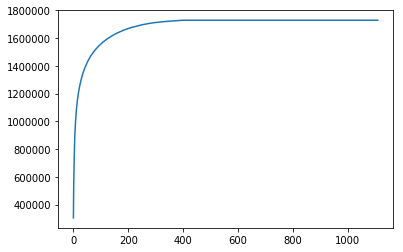

In [10]:
plt.plot(np.cumsum(eivl))

In [11]:
def do_pca(n_comps, d):
    centr = d - med
    to = np.dot(centr, eivc)
    to[:, n_comps:] = 0.0
    back = np.dot(to, inveivc) + med
    return back

In [12]:
def to_image(d):
    return d.astype(float).reshape(-1, imgsize[1], imgsize[0])

In [13]:
flat_back = do_pca(70, flat)
images_back = to_image(flat_back)

/home/zach/notebooks/.env/lib/python2.7/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


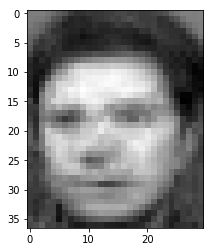

In [14]:
plt.imshow(images_back[0], cmap='gray')

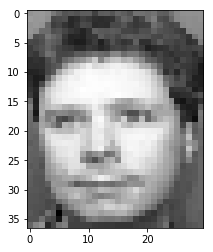

In [15]:
plt.imshow(np.array(images[0]), cmap='gray')

In [16]:
eiimg = to_image(eivc)

/home/zach/notebooks/.env/lib/python2.7/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


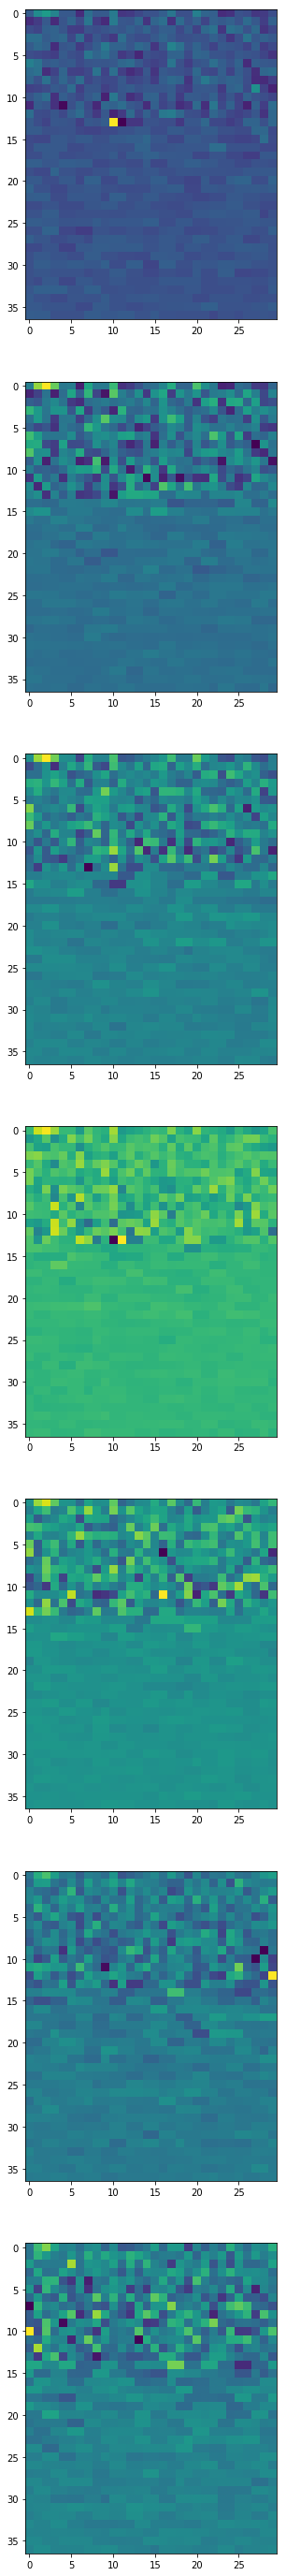

In [17]:
plt.figure(figsize = (10, 50))
for i in range(7):
    plt.subplot(7, 1, i + 1)
    plt.imshow(eiimg[i])

In [18]:
me = np.array(Image.open('data/pca/2014-04-22-143134.jpg').convert('L').resize(imgsize))

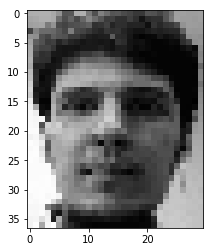

In [19]:
plt.imshow(me, cmap='gray')

In [20]:
me_back = do_pca(80, np.array([me.flatten()]))

In [21]:
me_img_back = to_image(me_back)

/home/zach/notebooks/.env/lib/python2.7/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


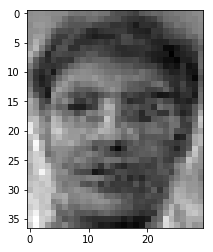

In [22]:
plt.imshow(me_img_back[0], cmap='gray')